In [3]:
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [7]:
def get_ts(line):
	tmp = line.split()
	dt = datetime.datetime.strptime(tmp[0], "%H:%M:%S.%f")
	return dt

def parse_file(fname):
    f = open(fname, "r")
    binded = {}
    delete_ts = []
    added_ts = []
    insert_ts = []
    bind_ts = []
    fetch_ts = []
    fetch_count = []
    net_ts = []
    insert_str = "Insert/Update pod"
    delete_str = "Deleting pod"
    bind_str = "EmulatedPodToNodeBinder - Binding"
    fetch_str = "Fetchcount"
    added_str = "pod added"
    for line in f.readlines():
        if "system-pod" in line or "-resource-dummy" in line:
            continue
        if added_str in line:
            added_ts.append(get_ts(line))
        if insert_str in line:
            i1 = line.index(insert_str)
            tmp = line[i1+len(insert_str):].split(",")
            pid = tmp[0].lstrip().rstrip()
            name = tmp[1].lstrip().split()[0]
            insert_ts.append(get_ts(line))   
            net_ts.append(insert_ts[-1])      
        if delete_str in line:
            i1 = line.index(delete_str)
            tmp = line[i1+len(delete_str):].split(",")[0]
            pid = tmp.split(":")[1].lstrip().rstrip()
            name = tmp.split("(")[0].strip()
            delete_ts.append(get_ts(line))
            net_ts.append(delete_ts[-1])
        if bind_str in line:
            i1 = line.index(bind_str)
            tmp = line[i1+len(insert_str):].split(")")[0]
            pid = tmp.split("uid:")[1].strip()
            name = (tmp.split("(")[0]).split("/")[1]
            binded[pid] = name
            bind_ts.append(get_ts(line))
        if fetch_str in line:
            tmp = line.split()
            fetch_ts.append(get_ts(line))
            fetch_count.append(int(tmp[-1]))
    f.close()

    print("Total inserted: %d" % len(insert_ts))
    print("Total binded: %d" % len(binded))
    return insert_ts, added_ts, delete_ts, bind_ts, fetch_ts, fetch_count

In [8]:
fname = "/Users/krong/Desktop/dcm-log/scope_5k_norm.txt"
insert_ts, added_ts, delete_ts, bind_ts, fetch_ts, fetch_count = parse_file(fname)

Total inserted: 1373
Total binded: 1225


(0.0, 1800.0)

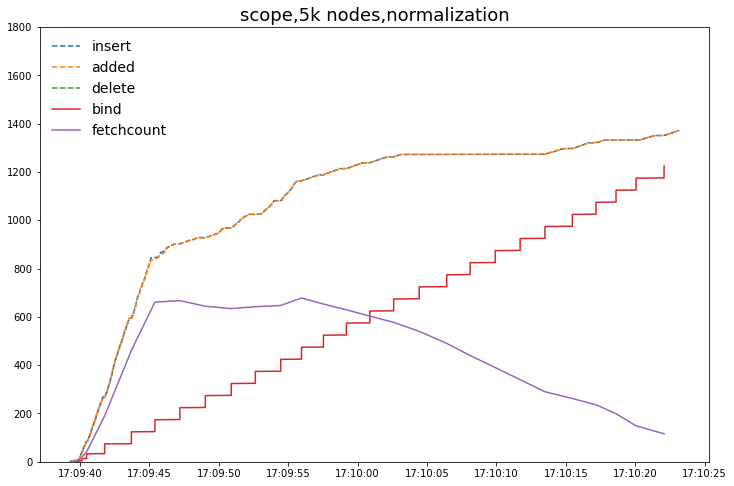

In [10]:
plt.figure(figsize=(12,8))
plt.plot(insert_ts, range(len(insert_ts)), label='insert', linestyle='--')
plt.plot(added_ts, range(len(added_ts)), label='added', linestyle='--')
plt.plot(delete_ts, range(len(delete_ts)), label='delete', linestyle='--')
plt.plot(bind_ts, range(len(bind_ts)), label='bind')
plt.plot(fetch_ts, fetch_count, label='fetchcount')
plt.legend(fontsize=14, frameon=False)
plt.ylim(0, 1800)
plt.title("scope,5k nodes,normalization", fontsize=18)
